In [1]:
import commpy as cp
import matplotlib.pyplot as plt
import numpy as np

### Informacija o odašiljaču

In [2]:
freq_lo = 2.2e9
sample_rate = 1e6
bandwidth = 1e6

### Informacija o Root Raised Cosine filtru
* veličina filtera je 100 uzoraka, a alfa=0.2
* korišten je scikit-commpy package
* zadatak jest izvesti **konvoluciju** snimljenog signala s rrcos filterom (npr. s numpy)
* pažnja - nakon konvolucije smanjiti razinu signala za 1/10 (rezultat konvolucije ispadne prevelik)

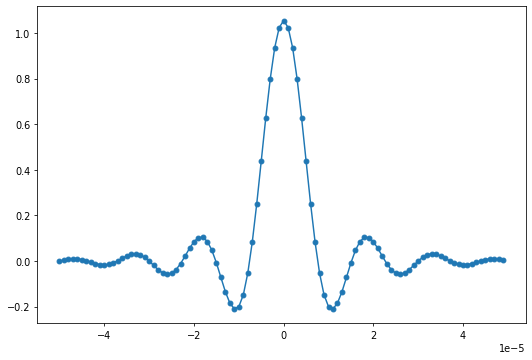

In [3]:
# generiranje filtra

sample_rate = 1e6
samples_per_symbol = 8

t_rc, h_rc = cp.rrcosfilter(N=100, alpha=0.2, Ts = samples_per_symbol/sample_rate, Fs = sample_rate)

fig = plt.figure(figsize=(9,6), dpi=70)
ax = fig.add_subplot(111)
ax.plot(t_rc, h_rc, '.-', markersize=10)

### Informacija o modulaciji

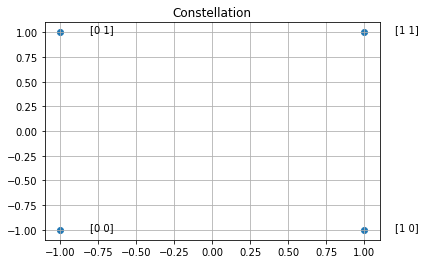

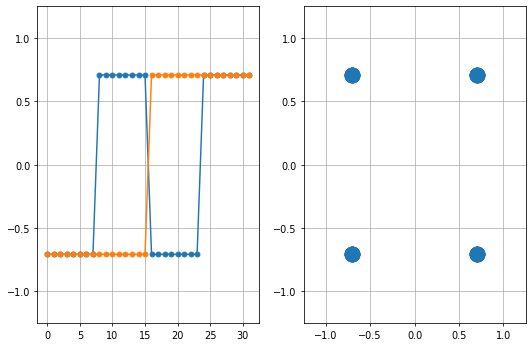

In [4]:
# MODULATION  

mod = cp.modulation.QAMModem(4)
# gotovo isti kao QPSK, kasnije se normira

bit_array = [0,0,1,0,0,1,1,1]
iq_symbols = mod.modulate(bit_array) / np.sqrt(2)
# normirano na QPSK kružnicu promjera 1

samples_per_symbol = 8
x = np.array([])
x = np.repeat((iq_symbols), samples_per_symbol)

mod.plot_constellation()  # prikaz konstelacije, bez normiranja

# prikaz simbola i normirane konstelacije
fig = plt.figure(figsize=(9,6), dpi=70)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax2.set_ylim(-1.25, 1.25)
ax2.set_xlim(-1.25, 1.25)
ax2.grid(True)
ax1.grid(True)
ax1.set_ylim(-1.25, 1.25)

ax1.plot(np.real(x), '.-',
        np.imag(x), '.-', markersize=10)
# ax1.set_xlim([0, 256])
ax2.plot(np.real(x), np.imag(x),'.', markersize=30)

### Informacija o demodulaciji

In [5]:
# koristi se isti commpy package

mod = cp.modulation.QAMModem(4)
demod_bits = mod.demodulate(input_symbols = iq_symbols, demod_type='hard')

print(demod_bits)

[0 0 1 0 0 1 1 1]


### **Pretvorba slike u niz bitova i obratno**

* funkcije s primjerom slike

In [6]:
'''
Pretvorba slike u 'grayscale' i zatim u niz bitova
za kreiranje ove dvije funkcije korišten je ChatGPT
'''

from PIL import Image

def image_to_bit_array(image_path):
    # Open the image
    img = Image.open(image_path)

    # Convert the image to grayscale
    img = img.convert('L')

    # Get the image data as a list of pixel values
    pixel_values = list(img.getdata())

    # Convert pixel values to a binary string
    binary_string = ''.join(format(pixel, '08b') for pixel in pixel_values)

    # Convert the binary string to a list of integers
    bit_array = [int(bit) for bit in binary_string]

    return bit_array

# Example usage
image_path = 'primjer_slika.jpg'
bit_array_of_image = image_to_bit_array(image_path)

In [7]:
'''
Pretvorba niza bitova u 'grayscale' sliku
'''

def bit_array_to_image(bit_array, width, height):
    # Convert the bit array to a binary string
    binary_string = ''.join(str(bit) for bit in bit_array)

    # Create a list of integers from the binary string
    pixel_values = [int(binary_string[i:i+8], 2) for i in range(0, len(binary_string), 8)]

    # Create a new image with the specified width and height
    img = Image.new('L', (width, height))

    # Put the pixel values into the image
    img.putdata(pixel_values)

    return img

width = 500  # Specify the width of the image
height = 625  # Specify the height of the image

image = bit_array_to_image(bit_array_of_image, width, height)
image.show()

### Podaci o nepoznatoj slici

* 40x46 piksela
* 8 bita po pikselu
* grayscale pretvorena prema 'image_to_bit_array'

### Podaci o ključnoj riječi

[1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


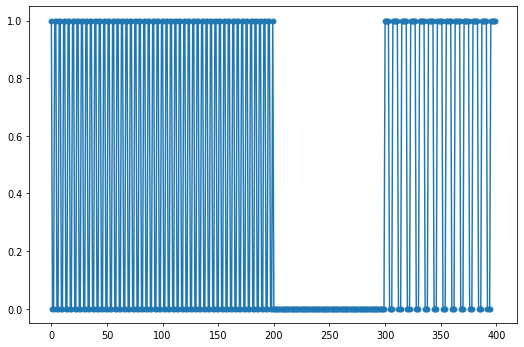

In [8]:
'''
Prije niza bitova od slike slati će se ključna riječ.
Sastoji se od ponavljanja simbola u dva dijela.
1. dio niz od dva simbola [10,01] ponavlja se 50 puta
2. dio jedan simbol [00] ponavlja se 50 puta

Ovako postavljena ključna riječ trebala bi se jednostavno uočiti
i razlikovati od bitova slike.

'''

sync_pattern = np.array([1,0,0,1])
sync_pattern = np.tile(sync_pattern, 50)

sync_pattern_2 = np.array([0,0])
sync_pattern_2 = np.tile(sync_pattern_2, 50)

sync_pattern = np.ndarray.tolist(sync_pattern)
sync_pattern_2 = np.ndarray.tolist(sync_pattern_2)
print(sync_pattern + sync_pattern_2)

bit_array_final = sync_pattern + sync_pattern_2 + bit_array_of_image

fig = plt.figure(figsize=(9,6), dpi=70)
plt.plot(bit_array_final[0:400], '.-', markersize=10)